In [3]:
import pandas as pd
import numpy as np

In [34]:
projects = pd.read_csv('motus-projects.csv')
species = pd.read_csv('species.csv')
antenna_deployments = pd.read_csv('antenna-deployments.csv')
receiver_deployments = pd.read_csv('receiver-deployments.csv')
tag_deployments = pd.read_csv('tag-deployments.csv')

In [373]:
species.groupby('group').count()

,id,english,french,scientific,code,sort
group,,,,,,
BATS,45,45,9,45,0,45
BEETLES,3806,3802,0,3806,0,3806
BIRDS,10825,10825,10825,10825,0,10825
BUTTERFL,165,165,165,165,0,165
HYMENOPTERA,288,1,0,288,0,288
MAMMALS,4679,2914,7,4679,0,4679
MOTHS,2348,850,0,2348,0,2348
ODONATA,170,170,0,170,0,170
ORTHOPTERA,33,32,0,33,0,33


In [18]:
for ele in (projects, species, antenna_deployments, receiver_deployments):
    print(ele.columns)

Index(['projectID', 'projectName', 'projectCode', 'descriptionShort',
       'descriptionLong', 'startYear', 'endYear', 'createdDt',
       'securable_bin'],
      dtype='object')
Index(['id', 'english', 'french', 'scientific', 'code', 'group', 'sort'], dtype='object')
Index(['motusRecvID', 'recvProjectID', 'receiverID', 'recvDeployID', 'port',
       'antennaType', 'bearing', 'magneticBearing', 'trueBearing', 'tilt',
       'polBearing', 'polTilt', 'heightMeters', 'filter', 'cableLengthMeters',
       'cableType', 'mountDistanceMeters', 'mountBearing', 'details',
       'elevationAngle', 'polarization1', 'polarization2', 'deploymentStatus',
       'dongle_type', 'frequency'],
      dtype='object')
Index(['motusRecvID', 'recvProjectID', 'receiverID', 'receiverType',
       'recvDeployID', 'deploymentStatus', 'deploymentName', 'siteName',
       'dtStart', 'dtEnd', 'tsStart', 'tsEnd', 'latitude', 'longitude',
       'elevation', 'isMobile', 'macAddress', 'locationPrecision'],
      dtyp

In [23]:
import sqlite3
import pandas as pd

con = sqlite3.connect('motus.db')  # подключение
cur = con.cursor()  # курсор

### Creating the table

In [108]:
import pandas as pd
import numpy as np
import sqlite3
import pandas as pd

con = sqlite3.connect('tables/motus.db')  # подключение
cur = con.cursor()  # курсор

In [405]:
import requests
from fake_useragent import UserAgent
from bs4 import BeautifulSoup

import time
import random

session = requests.session()
known_proxy_ip = '109.173.86.43:8000'
proxy = {'http': known_proxy_ip, 'https': known_proxy_ip}

with open('errors.txt', 'w') as f:
    pass

In [406]:
def get_page(url): #скачивает страницу в soup
    
    user_agent = UserAgent().chrome
    try:
        response = session.get(url, headers={'User-Agent':user_agent})
    except Exception as err:
        with open('errors.txt', 'a') as f:
            f.write(f'{err}\t{url}\n')
    #response = session.get(url, proxies=proxy)
    soup = BeautifulSoup(response.text, 'html.parser')
    time.sleep(random.random())
    
    return soup

In [54]:
down = get_page('https://motus.org/data/downloads')

In [74]:
down_links = []

for ele in down.find_all('a'):
    if 'api-proxy' in ele['href']:
        down_links.append(ele['href'])
        
down_links

['/data/downloads/api-proxy/projects/descriptions;jsessionid=1C8A77B01E1B4321930583282356253A?fmt=csv&showAll=true',
 '/data/downloads/api-proxy/tags;jsessionid=1C8A77B01E1B4321930583282356253A?fmt=csv',
 '/data/downloads/api-proxy/tags/deployments;jsessionid=1C8A77B01E1B4321930583282356253A?fmt=csv',
 '/data/downloads/api-proxy/receivers/deployments;jsessionid=1C8A77B01E1B4321930583282356253A?fmt=csv',
 '/data/downloads/api-proxy/receivers/antennas;jsessionid=1C8A77B01E1B4321930583282356253A?fmt=csv',
 '/data/downloads/api-proxy/receivers/gps;jsessionid=1C8A77B01E1B4321930583282356253A?fmt=csv',
 '/data/downloads/api-proxy/fields;jsessionid=1C8A77B01E1B4321930583282356253A',
 '/data/downloads/api-proxy/species;jsessionid=1C8A77B01E1B4321930583282356253A',
 '/data/downloads/api-proxy/tags/active;jsessionid=1C8A77B01E1B4321930583282356253A']

In [73]:
url = 'https://motus.org/data/downloads/api-proxy/tags;jsessionid=1C8A77B01E1B4321930583282356253A?fmt=csv'
r = requests.get(url, allow_redirects=True)
open('ex.csv', 'wb').write(r.content)

5632052

In [89]:
names = dict(zip(down_links, [
    'motus_projects',
    'tags',
    'tag_deployments',
    'receiver_deployments',
    'antenna_deployments',
    'receivers',
    'fields',
    'species',
    'active_tags'
]))

def csv_loader(url, name, base='https://motus.org', folder='tables/'):
    url = base + url
    r = requests.get(url, allow_redirects=True)
    open(folder + name + '.csv', 'wb').write(r.content)
    
for url, name in names.items():
    csv_loader(url, name)

In [110]:
with open('tables/species.csv', 'r') as f:
    content = f.read()
    
content = content.replace('group', 'group_')

with open('tables/species.csv', 'w') as f:
    f.write(content)

### Database

In [1]:
import sqlite3
import pandas as pd

con = sqlite3.connect('tables/motus.db')  # подключение
cur = con.cursor()  # курсор

import os

def to_sqlite(file, folder='tables/', stops=[]):
    if file not in stops:
        df = pd.read_csv(os.path.join(folder, file), engine='python')
        df.to_sql(file, con, if_exists='replace', index=False)

In [22]:
for file in os.listdir('tables/'):
    if file.endswith('.csv'):
        to_sqlite(file)

### Maps 

In [ ]:
con = sqlite3.connect('motus.db')  # подключение
cur = con.cursor()  # курсор

query = '''SELECT english, group_, gpsLat, gpsAlt, projectName
FROM motus_projects
    JOIN tag_deployments ON tag_deployments.tagProjectID = motus_projects.projectID
    JOIN species ON species.id = tag_deployments.speciesID
    JOIN receivers ON receivers.recvProjectID = motus_projects.projectID
LIMIT 100'''

cur.execute(query)
cur.fetchall()

In [45]:
from datetime import datetime
import time

ts = 1394547416

dt_object = datetime.fromtimestamp(ts)
round(time.time()) - 

1647286937

In [37]:
query = '''SELECT speciesID, english, group_, gpsLat, gpsAlt, ts, projectName
FROM motus_projects
    JOIN tag_deployments ON tag_deployments.tagProjectID = motus_projects.projectID
    JOIN species ON species.id = tag_deployments.speciesID
    JOIN receivers ON receivers.recvProjectID = motus_projects.projectID
WHERE english="1000069" AND gpsLat!="" AND ts
LIMIT 100'''

cur.execute(query)
res = cur.fetchall()

In [38]:
res

[('1000069',
  'buff-tailed bumblebee',
  'HYMENOPTERA',
  19.5811,
  179.6,
  'Wageningen University & Research'),
 ('1000069',
  'buff-tailed bumblebee',
  'HYMENOPTERA',
  51.4068,
  11.2,
  'Wageningen University & Research'),
 ('1000069',
  'buff-tailed bumblebee',
  'HYMENOPTERA',
  51.4068,
  12.1,
  'Wageningen University & Research'),
 ('1000069',
  'buff-tailed bumblebee',
  'HYMENOPTERA',
  51.4069,
  6.6,
  'Wageningen University & Research'),
 ('1000069',
  'buff-tailed bumblebee',
  'HYMENOPTERA',
  51.4069,
  6.6,
  'Wageningen University & Research'),
 ('1000069',
  'buff-tailed bumblebee',
  'HYMENOPTERA',
  51.4069,
  7.3,
  'Wageningen University & Research'),
 ('1000069',
  'buff-tailed bumblebee',
  'HYMENOPTERA',
  51.4069,
  8.8,
  'Wageningen University & Research'),
 ('1000069',
  'buff-tailed bumblebee',
  'HYMENOPTERA',
  51.4069,
  8.9,
  'Wageningen University & Research'),
 ('1000069',
  'buff-tailed bumblebee',
  'HYMENOPTERA',
  51.4069,
  9.1,
  'Wageni

In [40]:
from ipyleaflet import Map, Polyline

locations = pd.DataFrame(res)[[3, 4]].values.tolist()

line = Polyline(
    locations=locations,
    color="red" ,
    fill=False
)

m = Map(center = (42.5, -41), zoom =2)
m.add_layer(line)
m

Map(center=[42.5, -41], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_…

In [299]:
import geopandas
from shapely.ops import unary_union

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
continents = world.groupby('continent')['geometry'].apply(unary_union).reset_index()
continents

,continent,geometry
0,Africa,"MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ..."
1,Antarctica,"MULTIPOLYGON (((-61.139 -79.981, -60.610 -79.6..."
2,Asia,"MULTIPOLYGON (((48.679 14.003, 48.239 13.948, ..."
3,Europe,"MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ..."
4,North America,"MULTIPOLYGON (((-155.222 19.240, -155.542 19.0..."
5,Oceania,"MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9..."
6,Seven seas (open ocean),"POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5..."
7,South America,"MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4..."


<AxesSubplot:>

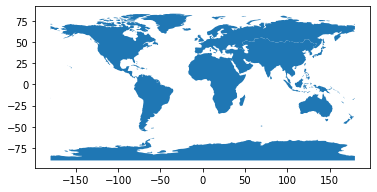

In [291]:
continents['geometry'].plot()

In [305]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point([30, -10])
continents.loc[continents['geometry'].contains(point)]

,continent,geometry
0,Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6..."


In [284]:
world.loc[world['geometry'].contains(point)]['continent']

159    Antarctica
Name: continent, dtype: object

In [20]:
import geopandas
from shapely.ops import unary_union
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
continents = world.groupby('continent')['geometry'].apply(unary_union).reset_index()

def continent(gps):
    point = Point(reversed(gps))
    if continents.loc[continents['geometry'].contains(point)].empty:
        return ''
    else:
        return continents.loc[continents['geometry'].contains(point)]['continent'].values[0]

## CHANGES TO DATABASE EVERYONE

In [21]:
continent([43.4538, -81.1985])

'North America'

In [22]:
rd = pd.read_csv('receiver_deployments.csv')
rd['args'] = rd[['latitude', 'longitude']].values.tolist()
rd['continent'] = rd['args'].apply(continent)
#rd.drop(columns=['args'], inplace=True)
rd
#rd.groupby('continent').count()

,motusRecvID,recvProjectID,receiverID,receiverType,recvDeployID,deploymentStatus,deploymentName,siteName,dtStart,dtEnd,tsStart,tsEnd,latitude,longitude,elevation,isMobile,macAddress,locationPrecision,args,continent
0,383,1,SG-5113BBBK0173,SENSORGNOME,8102,terminated,Binbrook Conservation Area,Binbrook Conservation Area,2021-06-09 16:00:00 +00:00,2021-08-27 16:00:00 +00:00,1.623254e+09,1.630080e+09,43.0997,-79.8309,NaN,False,0.0,Exact,"[43.0997, -79.8309]",North America
1,383,1,SG-5113BBBK0173,SENSORGNOME,681,terminated,Crysler Park Marina,Crysler Park Marina,2014-07-31 00:00:00 +00:00,2016-11-19 00:00:00 +00:00,1.406765e+09,1.479514e+09,44.9367,-75.0867,NaN,False,0.0,Exact,"[44.9367, -75.0867]",North America
2,383,1,SG-5113BBBK0173,SENSORGNOME,3560,terminated,Crysler Park Marina,Crysler Park Marina,2016-11-19 00:00:00 +00:00,2020-01-10 23:59:00 +00:00,1.479514e+09,1.578701e+09,44.9367,-75.0867,NaN,False,0.0,Exact,"[44.9367, -75.0867]",North America
3,383,1,SG-5113BBBK0173,SENSORGNOME,8137,terminated,Dunkirk Lighthouse,Dunkirk Lighthouse,2021-09-09 12:00:00 +00:00,2021-09-09 12:00:00 +00:00,1.631189e+09,1.631189e+09,42.4930,-79.3553,NaN,False,0.0,Exact,"[42.493, -79.3553]",North America
4,383,1,SG-5113BBBK0173,SENSORGNOME,7722,terminated,New Farm,New Farm,2020-11-26 00:00:00 +00:00,2021-04-13 23:59:00 +00:00,1.606349e+09,1.618358e+09,44.2884,-80.2239,NaN,False,0.0,Exact,"[44.2884, -80.2239]",North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4703,3224,487,SG-29EDRPI34C11,SENSORGNOME,8418,active,Lethbridge College Motus Receiver,Lethbridge College Motus Receiver,2022-02-14 00:00:00 +00:00,NaN,1.644797e+09,NaN,49.6635,-112.8080,933.0,False,0.0,Exact,"[49.6635, -112.808]",North America
4704,4805,491,CTT-45CF276ABC75,SENSORSTATION,8432,active,ER South,ER South,2022-02-25 00:00:00 +00:00,NaN,1.645747e+09,NaN,27.5989,-81.7344,NaN,False,0.0,Exact,"[27.5989, -81.7344]",North America
4705,4808,493,CTT-BCD32107830B,SENSORSTATION,8440,active,NCNERR - Masonboro Island,NCNERR - Masonboro Island,2021-11-22 20:00:00 +00:00,NaN,1.637611e+09,NaN,34.1351,-77.8462,NaN,False,0.0,Exact,"[34.1351, -77.8462]",North America
4706,4826,494,SG-3115BBBK1319,SENSORGNOME,8455,active,Eastpoint,Eastpoint,2022-03-08 17:01:00 +00:00,NaN,1.646759e+09,NaN,29.7694,-84.8815,NaN,False,0.0,Exact,"[29.7694, -84.8815]",North America


In [28]:
from ipyleaflet import Map, Marker, MarkerCluster

locations = rd['args'].values.tolist()

'''marker = CircleMarker(locations=[12, 12],
                          radius = 7,
                          color = "red",
                          fill_color = "red"
                         )'''

'''markers = [Marker(location=x,
                          radius = 7,
                          color = "red",
                          fill_color = "red"
                         ) for x in locations]'''

m = Map(zoom=2)

marker_cluster = MarkerCluster(
    markers=markers
)

"""m.add_layer(marker_cluster)"""

'm.add_layer(marker_cluster)'

In [29]:
# where are the receivers
m

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [30]:
from ipywidgets.embed import embed_minimal_html

embed_minimal_html('templates/recv_map.html', views=[m])

In [472]:
m.save('templates/recv_map.html', title='Receivers')

In [327]:
cur.execute("DROP TABLE IF EXISTS receiver_deployments")
con.commit()

In [328]:
rd.to_sql(name='receiver_deployments', con=con, if_exists='append', index=False)

In [336]:
# database done; select species by continent and group

query = '''SELECT DISTINCT english, speciesID
FROM motus_projects
    JOIN tag_deployments ON tag_deployments.tagProjectID = motus_projects.projectID
    JOIN species ON species.id = tag_deployments.speciesID
    JOIN receiver_deployments ON motus_projects.projectID = receiver_deployments.recvProjectID
WHERE continent="Africa" AND group_="BIRDS"
LIMIT 100'''

cur.execute(query)
cur.fetchall()

[('Eastern Olivaceous Warbler', 'BIRDS', '36307'),
 ('Western Olivaceous Warbler', 'BIRDS', '36308'),
 ('Melodious Warbler', 'BIRDS', '36311'),
 ('Eurasian Reed Warbler', 'BIRDS', '46507')]

In [340]:
# find deployments with the birdie and datetimes

query = '''SELECT DISTINCT speciesID, recvDeployID, receiver_deployments.tsStart, receiver_deployments.tsEnd
FROM motus_projects
    JOIN tag_deployments ON tag_deployments.tagProjectID = motus_projects.projectID
    JOIN receiver_deployments ON motus_projects.projectID = receiver_deployments.recvProjectID
WHERE speciesID="36307"
LIMIT 100'''

cur.execute(query)
cur.fetchall()

[('36307', 4555, 1521072000.0, 1525996740.0000002),
 ('36307', 5156, 1554566400.0, 1557383880.0)]

In [361]:
%time

query = '''SELECT DISTINCT gpsLat, gpsLon
FROM receivers
WHERE recvDeployID=8102'''

cur.execute(query)
data = cur.fetchall()
data

CPU times: user 6 µs, sys: 14 µs, total: 20 µs
Wall time: 22.6 µs


[(43.0996, -79.8312),
 (43.0995, -79.8307),
 (43.0996, -79.8309),
 (43.0997, -79.8311),
 (43.0992, -79.8314),
 (43.0996, -79.831),
 (43.0977, -79.8318),
 (43.1002, -79.8302),
 (43.0995, -79.831),
 (43.0995, -79.8309),
 (43.1016, -79.8359),
 (43.0997, -79.831),
 (43.0997, -79.8309),
 (43.1, -79.8308),
 (43.0996, -79.8313),
 (43.0998, -79.8308),
 (43.099, -79.8315),
 (43.0911, -79.8332),
 (43.1002, -79.8318),
 (43.0997, -79.8307),
 (43.0993, -79.831),
 (43.0996, -79.8308),
 (43.0982, -79.831),
 (43.0998, -79.8304),
 (43.0996, -79.8311),
 (43.0991, -79.8317),
 (43.0993, -79.8312),
 (43.0956, -79.8332),
 (43.0987, -79.8298),
 (43.0982, -79.8309),
 (43.0997, -79.8314),
 (43.1004, -79.8305),
 (43.0999, -79.8307),
 (43.0994, -79.8312),
 (43.0995, -79.8308),
 (43.1056, -79.8393),
 (43.0994, -79.8309),
 (43.0994, -79.831),
 (43.0996, -79.8306),
 (43.0998, -79.8311),
 (43.099, -79.8313),
 (43.0997, -79.8301),
 (43.0998, -79.831),
 (43.0997, -79.8308),
 (43.1037, -79.8384),
 (43.0994, -79.8308),


In [356]:
data = pd.DataFrame(data, columns=['lat', 'long', 'ts'])
data

,lat,long,ts
0,42.9301,-81.1836,1.394547e+09
1,42.9300,-81.1832,1.394554e+09
2,42.9304,-81.1850,1.394558e+09
3,42.9299,-81.1848,1.394562e+09
4,42.9301,-81.1842,1.394565e+09
5,42.9303,-81.1845,1.394569e+09
6,42.9303,-81.1838,1.394573e+09
7,42.9320,-81.2005,1.394626e+09
8,42.9295,-81.1853,1.394630e+09
9,42.9305,-81.1839,1.394684e+09


In [476]:
from ipyleaflet import Map, Polyline

locations = data

line = Polyline(
    locations=locations,
    color="purple" ,
    fill=False
)

m = Map(center=locations[0], zoom=10)
m.add_layer(line)
m

Map(center=[43.0996, -79.8312], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [477]:
from ipywidgets.embed import embed_minimal_html

embed_minimal_html('templates/recv_map.html', views=[m])

In [199]:
from ipyleaflet import basemaps

m = Map(zoom=3)

m.add_layer(basemaps.Esri.WorldStreetMap)

m.save('m.html')

In [201]:
import folium

m = folium.Map(location=[45.5236, -122.6750])
m.save('templates/recv_map.html')

### Creating the test

In [403]:
query = '''SELECT DISTINCT speciesID, english, group_, continent
FROM tag_deployments
    JOIN motus_projects ON tag_deployments.tagProjectID = motus_projects.projectID
    JOIN species ON species.id = tag_deployments.speciesID
    JOIN receiver_deployments ON motus_projects.projectID = receiver_deployments.recvProjectID
WHERE group_!='BIRDS'
'''

cur.execute(query)
cur.fetchall()

[('100130', "Townsend's Big-eared Bat", 'BATS', 'North America'),
 ('100190', 'Big Brown Bat', 'BATS', 'North America'),
 ('100190', 'Big Brown Bat', 'BATS', ''),
 ('100230', 'Silver-haired Bat', 'BATS', 'North America'),
 ('100250', 'Eastern Red Bat', 'BATS', ''),
 ('100250', 'Eastern Red Bat', 'BATS', 'North America'),
 ('100270', 'Hoary Bat', 'BATS', ''),
 ('100270', 'Hoary Bat', 'BATS', 'North America'),
 ('100320', 'Seminole Bat', 'BATS', ''),
 ('100320', 'Seminole Bat', 'BATS', 'North America'),
 ('100400', 'Gray Bat', 'BATS', 'North America'),
 ('100420', 'Eastern Small-footed Bat', 'BATS', 'North America'),
 ('100420', 'Eastern Small-footed Bat', 'BATS', ''),
 ('100430', 'Little Brown Bat', 'BATS', ''),
 ('100430', 'Little Brown Bat', 'BATS', 'North America'),
 ('100450', 'Northern Long-eared Bat', 'BATS', 'North America'),
 ('100450', 'Northern Long-eared Bat', 'BATS', ''),
 ('100460', 'Indiana Bat', 'BATS', 'North America'),
 ('100460', 'Indiana Bat', 'BATS', ''),
 ('100560',

In [401]:
species.groupby('group').count()

,id,english,french,scientific,code,sort
group,,,,,,
BATS,45,45,9,45,0,45
BEETLES,3806,3802,0,3806,0,3806
BIRDS,10825,10825,10825,10825,0,10825
BUTTERFL,165,165,165,165,0,165
HYMENOPTERA,288,1,0,288,0,288
MAMMALS,4679,2914,7,4679,0,4679
MOTHS,2348,850,0,2348,0,2348
ODONATA,170,170,0,170,0,170
ORTHOPTERA,33,32,0,33,0,33


# СЕЙЧАС Я СКАЧАЮ ВЕСЬ ИНТЕРНЕТ (выкачка картинок)

In [451]:
def get_wiki_image(name, link='https://en.wikipedia.org/wiki/'):
    wiki = get_page(link+name)
    l = wiki.find('img')['src']
    user_agent = UserAgent().chrome
    response = requests.get('https:'+l, headers={'User-Agent':user_agent}, stream=True)
    return Image.open(response.raw)

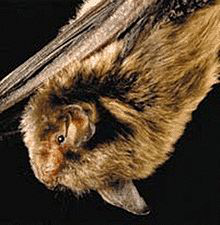

In [456]:
img = get_wiki_image('Indiana bat')
img

In [448]:
wiki = get_page('https://en.wikipedia.org/wiki/Melodious_warbler')
l = wiki.find('img')['src']
l
https://upload.wikimedia.org/wikipedia/commons/6/6a/Hippolais_polyglotta.jpg

'//upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Hippolais_polyglotta.jpg/220px-Hippolais_polyglotta.jpg'

# actual data analysis

In [49]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df = spark.read.option("header",True).csv("receivers.csv")

In [60]:
df.createOrReplaceTempView("receivers")

query = '''SELECT MAX(gpsLat)-MIN(gpsLat) AS dLat, MAX(gpsLon)-MIN(gpsLon) AS dLon, MAX(ts)-MIN(ts) AS dTime,
        recvDeployID
        FROM receivers
        GROUP BY recvDeployID
        ORDER BY recvDeployID'''

sqlDF = spark.sql(query)

In [85]:
data = sqlDF.toPandas()
data

,dLat,dLon,dTime,recvDeployID
0,0.5350,-0.0336,2219863.0,1031
1,0.0026,-0.0138,273600.0,1035
2,0.0007,-0.0007,4314578.0,1040
3,0.0000,-0.0001,6916342.0,1041
4,0.1712,-0.0165,12289453.0,1043
...,...,...,...,...
1606,0.0004,-0.0004,7449651.0,935
1607,0.0192,-0.1428,3894625.0,939
1608,0.0002,-0.0006,1210451.7,959
1609,0.0002,-0.0003,5174700.0,981


In [83]:
import pandas as pd
import sqlite3

con = sqlite3.connect("motus.db")
tab = pd.read_sql_query('''SELECT english, group_, speciesID, 
                receiver_deployments.deploymentStatus, receiver_deployments.recvProjectID, 
                receiver_deployments.recvDeployID
                
                FROM tag_deployments
JOIN receiver_deployments ON receiver_deployments.recvProjectID = tag_deployments.tagProjectID
JOIN species ON tag_deployments.speciesID = species.id
''', con)
tab

,english,group_,speciesID,deploymentStatus,recvProjectID,recvDeployID
0,Canada Goose,BIRDS,230,active,276,5729
1,Canada Goose,BIRDS,230,active,276,5730
2,Canada Goose,BIRDS,230,active,276,5731
3,Canada Goose,BIRDS,230,active,276,5732
4,Canada Goose,BIRDS,230,active,276,5752
...,...,...,...,...,...,...
829441,None,HYMENOPTERA,1000093,terminated,113,8015
829442,None,HYMENOPTERA,1000093,active,113,8036
829443,None,HYMENOPTERA,1000093,active,113,8081
829444,None,HYMENOPTERA,1000093,active,113,8181


In [87]:
import pandas as pd
import sqlite3

con = sqlite3.connect("motus.db")
tab = pd.read_sql_query('''SELECT english, group_, speciesID, 
                antenna_deployments.deploymentStatus, antenna_deployments.recvProjectID, 
                antenna_deployments.recvDeployID
                
                FROM tag_deployments
JOIN antenna_deployments ON antenna_deployments.recvDeployID = tag_deployments.tagDeployID
JOIN species ON tag_deployments.speciesID = species.id
''', con)
tab

,english,group_,speciesID,deploymentStatus,recvProjectID,recvDeployID
0,Black-crowned Night-Heron,BIRDS,2720,active,455,8389
1,Black-crowned Night-Heron,BIRDS,2720,active,455,8389
2,Black-crowned Night-Heron,BIRDS,2720,active,455,8390
3,Black-crowned Night-Heron,BIRDS,2720,active,455,8390
4,Black-crowned Night-Heron,BIRDS,2720,terminated,455,8391
...,...,...,...,...,...,...
10586,Common Green Darner,ODONATA,257061,terminated,19,5592
10587,Common Green Darner,ODONATA,257061,terminated,19,5592
10588,Common Green Darner,ODONATA,257061,terminated,40,2033
10589,Common Green Darner,ODONATA,257061,terminated,40,2033


In [129]:
data['recvDeployID'] = data['recvDeployID'].astype(int)

df = tab.set_index('recvDeployID').join(data.set_index('recvDeployID'))
df.dropna(subset=['dLat', 'dLon', 'dTime'], inplace=True)
df

,english,group_,speciesID,deploymentStatus,recvProjectID,dLat,dLon,dTime
recvDeployID,,,,,,,,
629,Red Knot,BIRDS,4670,terminated,1,0.941900,-0.541300,10571666.0
629,Red Knot,BIRDS,4670,terminated,1,0.941900,-0.541300,10571666.0
629,Red Knot,BIRDS,4670,terminated,1,0.941900,-0.541300,10571666.0
630,Red Knot,BIRDS,4670,terminated,1,0.001000,-0.000700,10630623.0
630,Red Knot,BIRDS,4670,terminated,1,0.001000,-0.000700,10630623.0
...,...,...,...,...,...,...,...,...
8456,Red Knot,BIRDS,4670,active,14,0.000209,-0.000310,321974.0
8457,Red Knot,BIRDS,4670,active,485,0.000147,-0.000146,153061.0
8457,Red Knot,BIRDS,4670,active,485,0.000147,-0.000146,153061.0


In [130]:
collide = ['Snow Bunting', 'Red-eyed Vireo',
       'Common Green Darner', 'Northern Long-eared Bat',
       'Northern Saw-whet Owl', 'Loggerhead Shrike', 'American Woodcock',
       'Saltmarsh Sparrow', 'Northern Waterthrush', 'Merlin',
       'Least Sandpiper', 'Monarch', 'Eastern Red Bat', 'Bicknell\'s Thrush',
       'Whimbrel', 'Leach\'s Storm-Petrel', 'White-throated Sparrow',
       'Yellow-billed Cuckoo', 'Red Phalarope', 'Yellow-rumped Warbler',
       'Great Black-backed Gull', 'Rusty Blackbird', 'Black-bellied Plover',
       'Eastern Small-footed Bat', 'Red-necked Phalarope',
       'Northern Long-eared Myotis', 'Pine Siskin', 'Eastern Pipistrelle',
       'Herring Gull', 'Big Brown Bat', 'Dunlin']

def sorter(s):
    if s in collide: 
        return 'Other'
    else:
        return s
    
df['english'] = df['english'].apply(sorter)
df.drop(columns=['speciesID', 'recvProjectID', 'deploymentStatus'], inplace=True)
df = df.drop_duplicates()

In [131]:
df['english'].value_counts()

Other                          147
Red Knot                       131
Barn Swallow                   114
Semipalmated Sandpiper         107
Bank Swallow                    61
Blackpoll Warbler               55
Swainson's Thrush               48
Magnolia Warbler                44
Indiana Bat                     42
Canada Warbler                  40
Sanderling                      39
Ruddy Turnstone                 37
Savannah Sparrow                33
Black-crowned Night-Heron       31
Wood Thrush                     31
Little Brown Bat                27
Northern Wheatear               27
Common Tern                     25
Gray-cheeked Thrush             24
Cliff Swallow                   20
Semipalmated Plover             20
Black-throated Blue Warbler     19
Black-capped Chickadee          18
Arctic Tern                     18
American Redstart               17
Piping Plover                   16
White-rumped Sandpiper          15
Name: english, dtype: int64

# one hot

In [161]:
df_ohe = pd.get_dummies(df)
df_ohe

,dLat,dLon,dTime,english_American Redstart,english_Arctic Tern,english_Bank Swallow,english_Barn Swallow,english_Black-capped Chickadee,english_Black-crowned Night-Heron,english_Black-throated Blue Warbler,...,english_Semipalmated Plover,english_Semipalmated Sandpiper,english_Swainson's Thrush,english_White-rumped Sandpiper,english_Wood Thrush,group__BATS,group__BIRDS,group__BUTTERFL,group__MAMMALS,group__ODONATA
recvDeployID,,,,,,,,,,,,,,,,,,,,,
629,0.941900,-0.541300,10571666.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
630,0.001000,-0.000700,10630623.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
631,0.000300,-0.000300,3003021.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
632,0.001800,-0.000500,74363.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
633,0.000100,-0.000100,5844131.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,0.000127,-0.000200,410676.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8447,0.000102,-0.000145,329526.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8455,0.000100,-0.000100,90301.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [162]:
df_ohe['dDist'] = (df_ohe['dLat']**2 + df_ohe['dLon']**2)**0.5
df_ohe['speed'] = df_ohe['dDist'] / df_ohe['dTime']
df_ohe

,dLat,dLon,dTime,english_American Redstart,english_Arctic Tern,english_Bank Swallow,english_Barn Swallow,english_Black-capped Chickadee,english_Black-crowned Night-Heron,english_Black-throated Blue Warbler,...,english_Swainson's Thrush,english_White-rumped Sandpiper,english_Wood Thrush,group__BATS,group__BIRDS,group__BUTTERFL,group__MAMMALS,group__ODONATA,dDist,speed
recvDeployID,,,,,,,,,,,,,,,,,,,,,
629,0.941900,-0.541300,10571666.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1.086361,1.027616e-07
630,0.001000,-0.000700,10630623.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.001221,1.148245e-10
631,0.000300,-0.000300,3003021.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.000424,1.412791e-10
632,0.001800,-0.000500,74363.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.001868,2.512209e-08
633,0.000100,-0.000100,5844131.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.000141,2.419887e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,0.000127,-0.000200,410676.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0.000237,5.768918e-10
8447,0.000102,-0.000145,329526.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0.000177,5.379917e-10
8455,0.000100,-0.000100,90301.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.000141,1.566111e-09


# model training

In [164]:
df_ohe.dropna(inplace=True)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(df_ohe)
df_ohe

,dLat,dLon,dTime,english_American Redstart,english_Arctic Tern,english_Bank Swallow,english_Barn Swallow,english_Black-capped Chickadee,english_Black-crowned Night-Heron,english_Black-throated Blue Warbler,...,english_Swainson's Thrush,english_White-rumped Sandpiper,english_Wood Thrush,group__BATS,group__BIRDS,group__BUTTERFL,group__MAMMALS,group__ODONATA,dDist,speed
recvDeployID,,,,,,,,,,,,,,,,,,,,,
629,0.941900,-0.541300,10571666.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1.086361,1.027616e-07
630,0.001000,-0.000700,10630623.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.001221,1.148245e-10
631,0.000300,-0.000300,3003021.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.000424,1.412791e-10
632,0.001800,-0.000500,74363.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.001868,2.512209e-08
633,0.000100,-0.000100,5844131.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.000141,2.419887e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,0.000127,-0.000200,410676.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0.000237,5.768918e-10
8447,0.000102,-0.000145,329526.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0.000177,5.379917e-10
8455,0.000100,-0.000100,90301.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.000141,1.566111e-09


In [186]:
X = data[:, 2:-2]
y = data[:, -1]
X

array([[0.04754487, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04781009, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01349704, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00039407, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00143626, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0006764 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [187]:
from sklearn.decomposition import FactorAnalysis

transformer = FactorAnalysis(n_components=4, random_state=0)
X_transformed = transformer.fit_transform(X)
#X_transformed.shape
X = X_transformed

In [191]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression().fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

acc_train = mean_absolute_error(y_train, pred_train)
acc_test = mean_absolute_error(y_test, pred_test)
print('Train MAE: ', acc_train)
print('Test MAE: ', acc_test)
print('test mean:', np.mean(y_test))

Train MAE:  0.003985551246740003
Test MAE:  0.002709901122066088
test mean: 0.0011980085578273836


In [182]:
model.coef_

array([ 0.00179036,  0.00207412,  0.00403647,  0.01319569, -0.00023962,
       -0.00050657, -0.00014058])

In [171]:
weights_data = {"веса":model.coef_,
                "признаки": df_ohe.columns[2:-2]}
weights = pd.DataFrame(weights_data)
weights.sort_values("веса")

,веса,признаки
0,-6.361308e-03,dTime
28,2.800175e+10,group__BATS
31,2.800175e+10,group__MAMMALS
29,2.800175e+10,group__BIRDS
32,2.800175e+10,group__ODONATA
30,2.800175e+10,group__BUTTERFL
22,5.149742e+10,english_Savannah Sparrow
3,5.149742e+10,english_Bank Swallow
19,5.149742e+10,english_Red Knot
27,5.149742e+10,english_Wood Thrush
